In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#load dataset
df = pd.read_csv('travel_data.csv', header = None)

In [3]:
df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.rename(columns = {0:'time', 1:'travellers'}, inplace = True)

In [5]:
df

,time,travellers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df.describe()

,travellers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        144 non-null    object
 1   travellers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df['time'].min()

'1949-01'

In [9]:
df['time'].max()

'1960-12'

In [10]:
df['year_month'] = pd.to_datetime(df['time'], format='%Y-%m')

In [11]:
df

,time,travellers,year_month
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01
...,...,...,...
139,1960-08,606,1960-08-01
140,1960-09,508,1960-09-01
141,1960-10,461,1960-10-01
142,1960-11,390,1960-11-01


In [12]:
df.drop('time', axis = 1, inplace = True)

In [13]:
df

,travellers,year_month
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01
...,...,...
139,606,1960-08-01
140,508,1960-09-01
141,461,1960-10-01
142,390,1960-11-01


In [14]:
new_df = df.set_index('year_month')

In [15]:
new_df

,travellers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [16]:
len(df['year_month'].value_counts())

144

In [17]:
df.isnull().sum()

travellers    0
year_month    0
dtype: int64

<AxesSubplot:xlabel='year_month'>

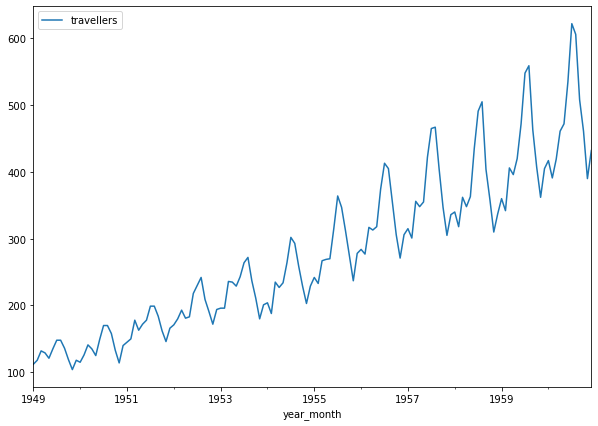

In [18]:
new_df.plot(figsize = (10,7))

/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='travellers', ylabel='Density'>

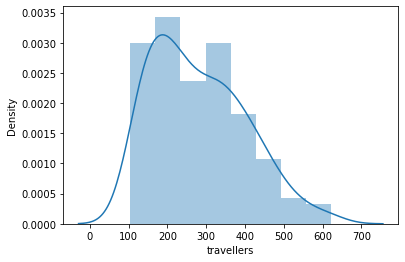

In [19]:
sns.distplot(new_df['travellers'])

<AxesSubplot:ylabel='Density'>

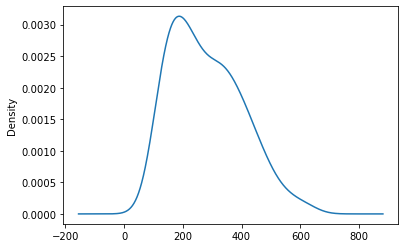

In [20]:
new_df['travellers'].plot(kind = 'kde')

/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_month', ylabel='travellers'>

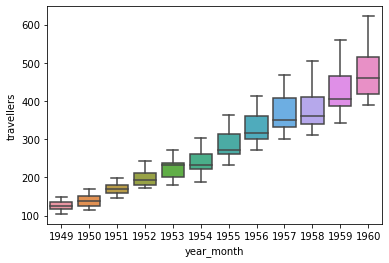

In [21]:
sns.boxplot(new_df['travellers'].index.year, new_df['travellers'], )

In [22]:
#1. Decomposing using statsmodel 

In [23]:
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.ar_model import AR 
from statsmodels.tsa.arima_model import ARMA, ARIMA
# from pyramid.arima import auto_arima 
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from fbprophet import Prophet

from math import sqrt

In [24]:
# decomposing time series

# a.) statsmodels are used
# b.) after decomposition, time series data deconstructs into several components, each component will represent one of the following categories
# c.) we'll be able to see seasonality, trend, residual components of our data

In [25]:
from pylab import rcParams 

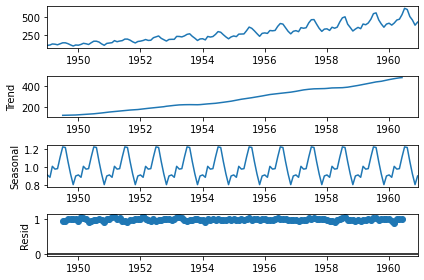

In [26]:
decom = sm.tsa.seasonal_decompose(new_df, model = 'multiplicative')
decom.plot()
plt.show()

In [27]:
# Stationarity 

# stationary -> no movement

# 1. time series is called a stationary graph when its statistical properties like mean, median, mode remain constant over time.
# 2. We assume TS is stationary 
# 3. Bcz in future it has to follow the same trend 
# 4. easier to implement than non stationary time series

# works very well for sales data

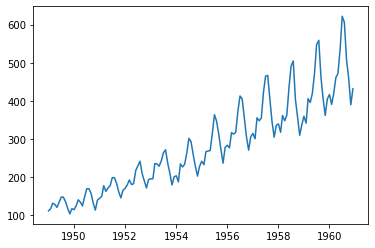

In [28]:
plt.plot(new_df)

In [29]:
# 3 methods to check stationarity of a graph:

# a. ACF, PACF plots - quick drop-off in correlation after a small amount of lag between points

# b. Plotting Rolling Statistics - plot moving averages or moving variance and see whether it varies with time. 
                                
#        Difference moving average/variance vs average/variance?
#          moving avg/var -> measured for any instant or time period
#          avg/var -> measured for last 12 months

# c. Augmented Dickey-Fuller Test
          
#          Null Hypothesis -> TS is non-stationary   
#          test results - test statistic and some critical values for different CI (Confidence intervals)
         
#          test statistic < critical value  => we reject the null hypothesis  -> TS is stationary

# these 3 methods are used to test whether a time series graph is stationary or not

Data -> EDA, Viz -> TS is stationary or non-stationary (3 tests) => Transformations if TS is non-stationary 

Prediction is also called as Forecasting:  Time Series Forecasting Models
    
    Auto Regression 
    Moving Average
    Autoregressive Moving Average (ARMA)
    Autoregressive Integrated Moving Average (ARIMA)
    Auto ARIMA
    Seasonal Autoregressive Integrated Moving Average (SARIMA)
    Auto SARIMA
    Tuned SARIMA
    SARIMAX

ACF and PACF plots

    ACF -> Auto correlation function
    PACF -> Partial Auto correlation Function
    
    Time series data is stationary -> ACF/PACF plots will show a quick drop-off in correlation
    Data is Non-stationary
    

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib
from matplotlib import pyplot

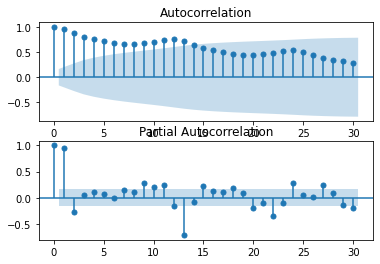

In [31]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(new_df['travellers'], ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(new_df['travellers'], ax=pyplot.gca(), lags = 30)
pyplot.show()

### Plotting Rolling Statistics 
####  if mean and std dev are not same over time then the TS is non-stationary

In [32]:
import pandas as pd

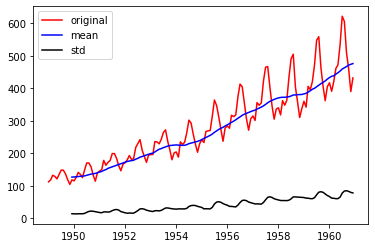

In [33]:
mean = new_df.rolling(12).mean()
std = new_df.rolling(12).std()

plt.plot(new_df, color = 'red', label = 'original')
plt.plot(mean, color = 'blue', label = 'mean')
plt.plot(std, color = 'black', label = 'std')
plt.legend()
plt.show()

### Augmented Dickey-Fuller Test



In [34]:

from statsmodels.tsa.stattools import adfuller

In [35]:
dftest = adfuller(new_df, autolag = 'AIC')
op = pd.Series(dftest[0:4], index = ['Test stat', 'p-val', 'lag', 'observation'])

for k,v in dftest[4].items():
    op['Critical val (%s)'%k] = v
    
print(op)


Test stat               0.815369
p-val                   0.991880
lag                    13.000000
observation           130.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


In [36]:
if op[0] < op[4]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Failed to Reject Ho - Time Series is Non-Stationary


In [37]:
new_df

,travellers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [38]:
ts = new_df.squeeze()


In [39]:
ts

year_month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: travellers, Length: 144, dtype: int64

In [40]:
type(ts)

pandas.core.series.Series

### Transformations

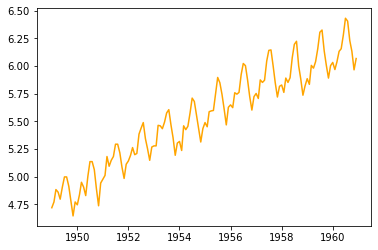

In [41]:
ts_log_transform = np.log(ts)
plt.plot(ts_log_transform, color = 'orange')

In [42]:
type(ts_log_transform)

pandas.core.series.Series

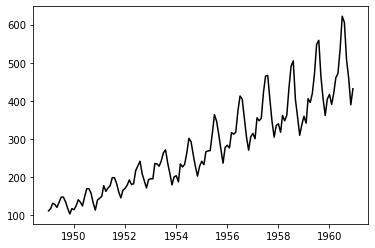

In [43]:
plt.plot(ts, color = 'black')

### Other transformations: 
    exponential transformation
    box cox tranformations
    square root transformations

In [44]:
moving_avg = ts.rolling(12).mean()

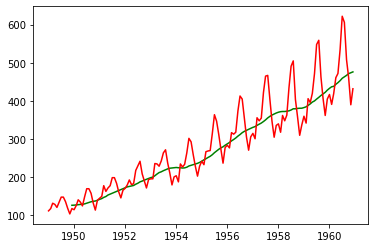

In [45]:
plt.plot(moving_avg, color = 'green')
plt.plot(ts, color = 'red')

### Differencing

In [46]:
ts_log_transform_diff = ts_log_transform - ts_log_transform.shift()

In [47]:
ts_log_transform_diff

year_month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: travellers, Length: 144, dtype: float64

In [48]:
ts_log_transform.shift()

year_month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
                ...   
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.133398
1960-12-01    5.966147
Name: travellers, Length: 144, dtype: float64

In [49]:
ts_log_transform

year_month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: travellers, Length: 144, dtype: float64

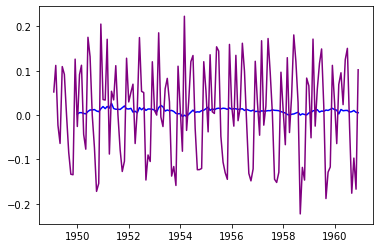

In [50]:
moving_avg_log_diff = ts_log_transform_diff.rolling(12).mean()
plt.plot(moving_avg_log_diff, color = 'blue')
plt.plot(ts_log_transform_diff, color = 'purple')

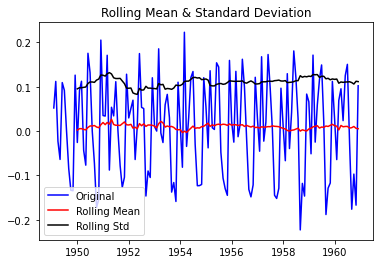

In [51]:
#Determing rolling statistics
rolLmean = ts_log_transform_diff.rolling(12).mean()
rolLstd = ts_log_transform_diff.rolling(12).std()


#Plot rolling statistics:
orig = plt.plot(ts_log_transform_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [52]:
#ts_log_transform_diff.dropna(inplace=True)

In [53]:
ts_log_transform_diff.dropna(inplace=True)

### Checking if the differentiated log transform is stationary

In [54]:
dftest_logdiff = adfuller(ts_log_transform_diff, autolag = 'AIC')
op_logdiff = pd.Series(dftest_logdiff[0:4], index = ['ADF Test stat', 'p-val', 'lag', 'observation'])

for k,v in dftest[4].items():
    op_logdiff['Critical val (%s)'%k] = v
    
print(op_logdiff)

ADF Test stat          -2.717131
p-val                   0.071121
lag                    14.000000
observation           128.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


In [55]:
op_logdiff[0]

-2.717130598388145

In [56]:
op_logdiff[5]

-2.8840418343195267

In [57]:
if op_logdiff[0] < op_logdiff[5]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Failed to Reject Ho - Time Series is Non-Stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test


In [58]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(ts_log_transform_diff)

print('p-value: %f' % kpss_test[1])

p-value: 0.100000


/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Since the p-value >0.05, the TS is Stationary.

In [59]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(ts_log_transform_diff, lags=12)

/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [60]:
model_fit=model.fit()

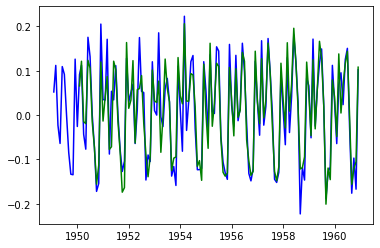

In [61]:
plt.plot(ts_log_transform_diff, color = 'blue')
plt.plot(model_fit.fittedvalues, color='green')
plt.show()

In [62]:
model_fit.fittedvalues.isnull()

year_month
1950-02-01    False
1950-03-01    False
1950-04-01    False
1950-05-01    False
1950-06-01    False
              ...  
1960-08-01    False
1960-09-01    False
1960-10-01    False
1960-11-01    False
1960-12-01    False
Length: 131, dtype: bool

In [63]:
np.nansum((model_fit.fittedvalues-ts_log_transform_diff)**2)

0.21436654564397406

/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

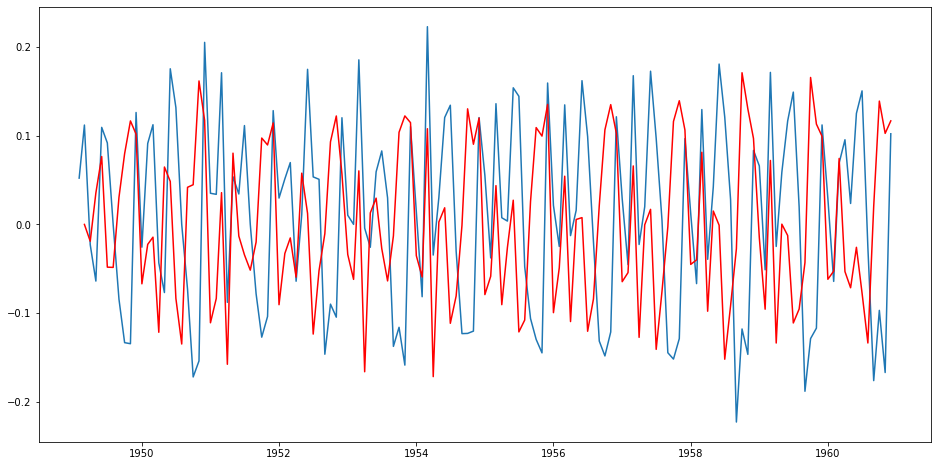

In [64]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model_arima = ARIMA(ts_log_transform_diff, order=(2,1,2))  
results_ARIMA = model_arima.fit()  
plt.plot(ts_log_transform_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [65]:
results_ARIMA.fittedvalues

year_month
1949-03-01   -0.000078
1949-04-01   -0.019059
1949-05-01    0.035480
1949-06-01    0.076548
1949-07-01   -0.048302
                ...   
1960-08-01   -0.133914
1960-09-01    0.020196
1960-10-01    0.139153
1960-11-01    0.102713
1960-12-01    0.116836
Length: 142, dtype: float64

### Taking results back to original scale

In [66]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

year_month
1949-03-01   -0.000078
1949-04-01   -0.019059
1949-05-01    0.035480
1949-06-01    0.076548
1949-07-01   -0.048302
dtype: float64


In [67]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

year_month
1949-03-01   -0.000078
1949-04-01   -0.019137
1949-05-01    0.016343
1949-06-01    0.092891
1949-07-01    0.044589
dtype: float64


In [68]:
ARIMA_diff_predictions_cumsum

year_month
1949-03-01   -0.000078
1949-04-01   -0.019137
1949-05-01    0.016343
1949-06-01    0.092891
1949-07-01    0.044589
                ...   
1960-08-01   -0.165706
1960-09-01   -0.145510
1960-10-01   -0.006357
1960-11-01    0.096357
1960-12-01    0.213192
Length: 142, dtype: float64

In [69]:
ts_log_transform

year_month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: travellers, Length: 144, dtype: float64

In [73]:
ARIMA_log_prediction = pd.Series(ts_log_transform.iloc[0], index=ts_log_transform.index)

In [74]:
ARIMA_log_prediction[2]

4.718498871295094

In [75]:
ARIMA_log_prediction

year_month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    4.718499
1960-09-01    4.718499
1960-10-01    4.718499
1960-11-01    4.718499
1960-12-01    4.718499
Length: 144, dtype: float64

In [76]:
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

year_month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718421
1949-04-01    4.699362
1949-05-01    4.734842
dtype: float64

In [77]:
ARIMA_log_prediction.dropna()

year_month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718421
1949-04-01    4.699362
1949-05-01    4.734842
                ...   
1960-08-01    4.552793
1960-09-01    4.572989
1960-10-01    4.712142
1960-11-01    4.814855
1960-12-01    4.931691
Length: 144, dtype: float64

Text(0.5, 1.0, 'RMSE: 197.8729')

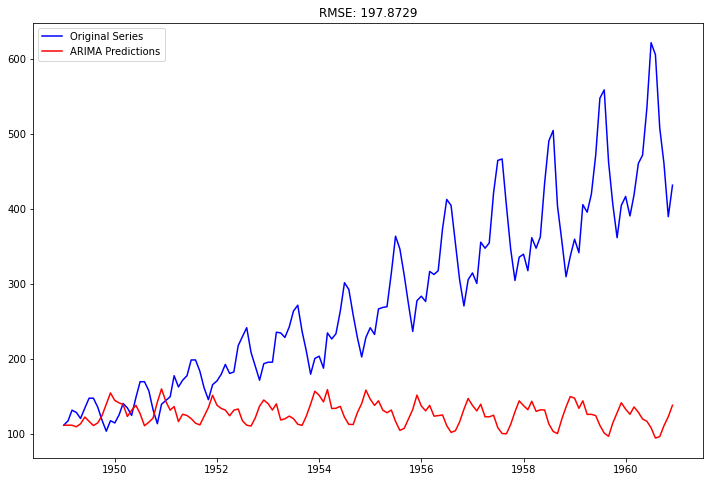

In [81]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(ts, color='blue', label = 'Original Series')
plt.plot(predictions_ARIMA, color='red', label ='ARIMA Predictions')
plt.legend(loc = 'best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [82]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [83]:
arimamodel(ts_log_transform)

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-238.764, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=176.160, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-228.131, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6.876, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=904.726, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-233.486, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-239.971, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-236.976, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-236.869, Time=0.35 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-250.913, Time=0.58 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-235.107, Time=0.76 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-241.708, Time=0.50 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-242.710, Time=0.59 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-

ARIMA(order=(5, 0, 3), scoring_args={}, suppress_warnings=True)